In [1]:
import pandas as pd
import numpy as np
import urllib.request

import matplotlib.pyplot as plt

from collections import Counter
from konlpy.tag import Okt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
data_path = "../data/"
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/steam.txt", filename=data_path + "steam.txt")

('../data/steam.txt', <http.client.HTTPMessage at 0x2849ab150>)

In [3]:
df = pd.read_table(data_path + "steam.txt", names=['label', 'reviews'])
print(len(df))
print(df.head(5))

100000
   label                               reviews
0      0                             노래가 너무 적음
1      0       돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다.
2      1      막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3      1  차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4      1   시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요


# Data Preprocessing

In [4]:
# check null and drop duplicate
print(df['label'].isnull().values.any())
print(df['reviews'].isnull().values.any())

print(df['reviews'].nunique())
df.drop_duplicates(subset=['reviews'], inplace=True)
print(df['reviews'].nunique(), len(df)) 

False
False
99892
99892 99892


79913 19979


<Axes: xlabel='label'>

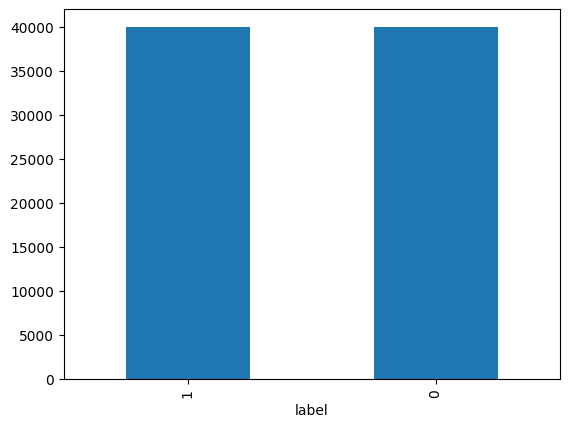

In [5]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=77)
print(len(df_train), len(df_test))
df_train['label'].value_counts().plot(kind='bar')

In [6]:
# remove non-Korean
df_train['reviews'].replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True, inplace=True)
df_train['reviews'].replace('', np.nan, inplace=True)
print(df_train['reviews'].isnull().sum())
print(df_train[:30]) # check

# apply to test data
df_test['reviews'].replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True, inplace=True)
df_test['reviews'].replace('', np.nan, inplace=True)
print(df_test['reviews'].isnull().sum())
print(df_test[:30]) # check

0
       label                                            reviews
79698      0                   전작보다 몰입이 떨어짐 보스전도없고 쓸데없는 캐릭만 더나옴
68365      1  재미있어요 물론 둘이 해야만 불친절해서 더 탐험욕구가 생기구요 신기한 경험도 많이 ...
39371      1   는 갓겜 맞다 키보드로 안하고 플스 패드로 해서 모르겠는데 플스 패드로 하면 더욱...
58974      0                                          고인물이 넘쳐난다
59716      1     분만 더하면 깰줄 알았는데 일걸려 한스테이지 깼어요 기묘한 난이도에 매우 반했습니다
48092      0               벗지않는 보단 벗는 가 더 꼴리니까 동인지나 구해서 딸이나 칩시다
7874       1                          재밋음 다만 자유로운 커스텀땜에 훈수가좀 잇음
12732      0  굳이 평가까지는 안하려고 했는데 기본컨텐츠 강화나 프리 디엘시가 아닌 유료 디엘시를...
36125      1  멀티로 인 플레이를 해서 클리어를 했습니다 스토리도 괜찮고 게임성도 좋았는데 눈이 ...
20279      0                                              아잠와  
2333       0  이겜은 모르면 맞아아지  배워야 기술이 외워진다는데언제 외우나여 기술도 모르면서 쳐...
15369      0  오픈월드 치곤 좋은 게임 하지만 오픈월드 치고는 너무 현실도가 떨어짐 하다보면 점점...
74781      1                                    그냥 아무생각없이 하기 좋음
37846      0  제겐 너무너무 어려운 게임이였어요 광활한 우주를 누비며 이것저것 해보고싶었는데 너무...
5586       1                          

# Tokenizing

In [7]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']

okt = Okt()

df_train['tokenized'] = df_train['reviews'].apply(lambda x: okt.morphs(x))
df_train['tokenized'] = df_train['tokenized'].apply(lambda x: [word for word in x if not word in stopwords])

df_test['tokenized'] = df_test['reviews'].apply(lambda x: okt.morphs(x))
df_test['tokenized'] = df_test['tokenized'].apply(lambda x: [word for word in x if not word in stopwords])

print(df_train['tokenized'][:30]) # check
print(df_test['tokenized'][:30]) # check

79698       [전작, 보다, 몰입, 떨어짐, 보스, 전도, 없고, 쓸데없는, 캐릭, 더, 나옴]
68365    [재미있어요, 물론, 둘, 해야만, 불친절해서, 더, 탐험, 욕구, 생기구요, 신기...
39371    [갓, 맞다, 키, 보드, 로, 안, 하고, 플스, 패드, 로, 해서, 모르겠는데,...
58974                                         [인물, 넘쳐, 난다]
59716    [분만, 더하면, 깰줄, 알았는데, 일, 걸려, 스테이지, 깼어요, 기묘한, 난이도...
48092    [벗지, 않는, 보단, 벗는, 더, 꼴리니까, 동인지, 나, 구해, 서, 딸, 이나...
7874                  [재밋음, 다만, 자유로운, 커, 스텀, 땜, 훈수, 좀, 잇음]
12732    [굳이, 평가, 까지는, 안, 하려고, 했는데, 기본, 컨텐츠, 강화, 나, 프리,...
36125    [멀티, 로, 플레이, 해서, 클리어, 했습니다, 스토리, 괜찮고, 성도, 좋았는데...
20279                                               [아, 잠]
2333     [모르면, 맞아아지, 배워야, 기술, 외워진다는데, 언제, 외우나여, 기술, 모르면...
15369    [오픈월드, 치곤, 좋은, 하지만, 오픈월드, 치고는, 너무, 현실, 떨어짐, 하다...
74781                             [그냥, 아무, 생각, 없이, 하기, 좋음]
37846    [제겐, 너무, 너무, 어려운, 였어요, 광활한, 우주, 누비, 며, 것, 저, 것...
5586                                          [넘, 모, 재밌는것]
54187                        [친구, 문명, 빠돌이, 전쟁, 광, 사지, 마세요]
43727            [밤, 이륙, 시키고, 킨다음, 숨, 자고, 일어나면, 착륙, 하는, 

In [8]:
positive_words = np.hstack(df_train[df_train['label'] == 1]['tokenized'].values)
negative_words = np.hstack(df_train[df_train['label'] == 0]['tokenized'].values)

positive_word_count = Counter(positive_words)
negative_word_count = Counter(negative_words)

print(positive_word_count.most_common(20))
print(negative_word_count.most_common(20))

[('로', 3767), ('으로', 3644), ('할', 2877), ('플레이', 2836), ('시간', 2597), ('입니다', 2570), ('것', 2493), ('너무', 2443), ('적', 2429), ('추천', 2428), ('때', 2411), ('하는', 2408), ('좀', 2289), ('갓', 2282), ('안', 2211), ('수', 2206), ('하고', 2159), ('에서', 2046), ('하면', 1997), ('생각', 1949)]
[('안', 4258), ('로', 3980), ('너무', 3657), ('못', 3312), ('으로', 3265), ('하고', 2704), ('할', 2543), ('개', 2376), ('적', 2306), ('그냥', 2290), ('시간', 2284), ('하는', 2245), ('거', 2235), ('것', 2162), ('왜', 2157), ('에서', 2140), ('플레이', 2125), ('나', 2081), ('좀', 2025), ('사람', 1914)]


In [9]:
positive_len = np.mean(df_train[df_train.label == 1]['tokenized'].map(lambda x: len(x)))
negative_len = np.mean(df_train[df_train.label == 0]['tokenized'].map(lambda x: len(x)))

print(positive_len)
print(negative_len)

13.164936851319245
13.5190843518333


In [14]:
# define train, test data
X_train = df_train['tokenized'].values
y_train = df_train['label'].values
X_test = df_test['tokenized'].values
y_test = df_test['label'].values

In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

threshold = 2

rare_word_cnt = 0
rare_word_freq = 0
total_word_cnt = len(tokenizer.word_index)
total_word_freq = 0

for word, count in tokenizer.word_counts.items(): # (word, word_count)
    total_word_freq += count
    if count < threshold:
        rare_word_cnt += 1
        rare_word_freq += count
        
print('단어 집합(vocabulary)의 크기 :', total_word_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_word_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_word_cnt / total_word_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_word_freq / total_word_freq)*100)

단어 집합(vocabulary)의 크기 : 72128
등장 빈도가 1번 이하인 희귀 단어의 수: 39225
단어 집합에서 희귀 단어의 비율: 54.3824866903283
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.678987797672085


In [17]:
vocab_size = total_word_cnt - rare_word_cnt + 2

tokenizer = Tokenizer(num_words=vocab_size, oov_token='OOV') # OOV: Out Of Vocabulary if word is not in vocab_size
tokenizer.fit_on_texts(X_train) # word -> index
X_train_seq = tokenizer.texts_to_sequences(X_train) # sentence -> word index
X_test_seq = tokenizer.texts_to_sequences(X_test)

print(X_train_seq[:3])
print(X_test_seq[:3])

[[195, 39, 448, 1817, 285, 4863, 129, 3966, 993, 28, 897], [1022, 443, 1283, 7087, 5149, 28, 1644, 2801, 1, 4265, 1035, 72, 143, 418, 556, 443, 1283, 7087], [34, 3339, 93, 318, 2, 4, 9, 1267, 259, 2, 48, 1253, 1267, 259, 2, 24, 837, 28, 303, 1]]
[[10585, 182, 126, 107, 452, 4100, 356, 2724, 6392, 1565, 469, 199, 473, 3, 405, 50, 1, 107, 437, 2024, 1565, 469, 2, 379], [2354, 1558, 67, 1215, 1109, 909, 470, 507, 98, 94, 113, 1483, 2, 24, 28, 837, 3548, 12, 137, 2268, 11, 3, 9679, 91, 94, 9, 10445, 649, 577, 4277, 10, 71, 26, 494, 3725, 3271, 137, 633, 775, 15393, 19, 10, 844], [714, 5201, 2042, 469, 15049, 1027, 39, 469, 15049, 1027, 673, 324, 63, 707, 465, 36, 231, 360, 109, 6420, 889, 3363, 10221, 80, 9520, 4547, 78]]


In [18]:
max_len_review = max(len(sentence) for sentence in X_train_seq)
avg_len_review = sum(map(len, X_train_seq)) / len(X_train_seq)

print('리뷰의 최대 길이 : {}'.format(max_len_review))
print('리뷰의 평균 길이 : {}'.format(avg_len_review))

리뷰의 최대 길이 : 59
리뷰의 평균 길이 : 13.341884299175353


In [19]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

below_threshold_len(42, X_train_seq)
max_len = 42

전체 샘플 중 길이가 42 이하인 샘플의 비율: 99.4994556580281


In [20]:
X_train_seq_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_seq_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Modeling

In [21]:
import re

from keras.layers import Embedding, Dense, LSTM, Bidirectional
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
embedding_dims = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dims))
model.add(Bidirectional(LSTM(hidden_units))) # using Bi-LSTM
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         3290500   
                                                                 
 bidirectional (Bidirection  (None, 256)               234496    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 3525253 (13.45 MB)
Trainable params: 3525253 (13.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model_path = '../model/'

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint(filepath=model_path + 'steam_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_seq_pad, y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2)

Epoch 1/15
250/250 [==============================] - ETA: 0s - loss: 0.5213 - acc: 0.7413
Epoch 1: val_acc improved from -inf to 0.78177, saving model to ../model/steam_best_model.h5
250/250 [==============================] - 36s 138ms/step - loss: 0.5213 - acc: 0.7413 - val_loss: 0.4633 - val_acc: 0.7818
Epoch 2/15
  1/250 [..............................] - ETA: 27s - loss: 0.4112 - acc: 0.8086

/Users/godpeny/Code/venv/laboratory/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - ETA: 0s - loss: 0.4087 - acc: 0.8180
Epoch 2: val_acc improved from 0.78177 to 0.78227, saving model to ../model/steam_best_model.h5
250/250 [==============================] - 36s 145ms/step - loss: 0.4087 - acc: 0.8180 - val_loss: 0.4615 - val_acc: 0.7823
Epoch 3/15
250/250 [==============================] - ETA: 0s - loss: 0.3724 - acc: 0.8377
Epoch 3: val_acc improved from 0.78227 to 0.78552, saving model to ../model/steam_best_model.h5
250/250 [==============================] - 38s 154ms/step - loss: 0.3724 - acc: 0.8377 - val_loss: 0.4673 - val_acc: 0.7855
Epoch 4/15
250/250 [==============================] - ETA: 0s - loss: 0.3439 - acc: 0.8534
Epoch 4: val_acc did not improve from 0.78552
250/250 [==============================] - 38s 152ms/step - loss: 0.3439 - acc: 0.8534 - val_loss: 0.4661 - val_acc: 0.7840
Epoch 5/15
250/250 [==============================] - ETA: 0s - loss: 0.3163 - acc: 0.8666
Epoch 5: val_acc did not improve from

In [25]:
loaded_model = load_model(model_path + 'steam_best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test_seq_pad, y_test)[1]))

625/625 [==============================] - 10s 16ms/step - loss: 0.4692 - acc: 0.7876

 테스트 정확도: 0.7876


# Inferencing

In [26]:
def predict(new_sentence):
    new_sentence = okt.morphs(new_sentence) # tokenize
    new_sentence = [word for word in new_sentence if not word in stopwords] # remove stopwords
    encoded = tokenizer.texts_to_sequences([new_sentence]) # encoding
    pad_new = pad_sequences(encoded, maxlen=max_len) # padding
    score = float(loaded_model.predict(pad_new)) # predict
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [27]:
predict("이 게임은 너무 재밌다. 그래픽도 좋고, 스토리도 좋다. 다만, 가격이 조금 비싸다.")

1/1 [==============================] - 0s 250ms/step
96.29% 확률로 긍정 리뷰입니다.


/var/folders/76/r353dd3n1cb9npy26cwjvyz00000gn/T/ipykernel_2209/921745657.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new)) # predict


In [28]:
predict("너무 구리다.")

1/1 [==============================] - 0s 13ms/step
79.52% 확률로 부정 리뷰입니다.


/var/folders/76/r353dd3n1cb9npy26cwjvyz00000gn/T/ipykernel_2209/921745657.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new)) # predict
